In [1]:
!pip install wget

In [2]:
import os
import numpy as np
import pandas as pd
import wget
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split


In [3]:
url = 'https://github.com/StuntShield/StuntShield-Stunting-Prediction-Model/raw/main/dataset/data_balita_full.zip'

filename = wget.download(url, './data_balita_full.zip')

with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('./dataset/data_balita_full')

In [4]:
data = pd.read_csv('./dataset/data_balita_full/data_balita_full.csv')
data

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,46.10,normal
1,0,laki-laki,46.11,normal
2,0,laki-laki,46.12,normal
3,0,laki-laki,46.13,normal
4,0,laki-laki,46.14,normal
...,...,...,...,...
501641,60,perempuan,96.05,severely stunted
501642,60,perempuan,96.06,severely stunted
501643,60,perempuan,96.07,severely stunted
501644,60,perempuan,96.08,severely stunted


In [5]:
data.isnull().sum()

Umur (bulan)         0
Jenis Kelamin        0
Tinggi Badan (cm)    0
Status Gizi          0
dtype: int64

In [6]:
data.describe()

,Umur (bulan),Tinggi Badan (cm)
count,501646.000000,501646.000000
mean,32.075942,90.191239
std,17.410943,18.983511
min,0.000000,33.600000
25%,17.000000,77.340000
50%,33.000000,90.140000
75%,47.000000,104.030000
max,60.000000,133.900000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501646 entries, 0 to 501645
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur (bulan)       501646 non-null  int64  
 1   Jenis Kelamin      501646 non-null  object 
 2   Tinggi Badan (cm)  501646 non-null  float64
 3   Status Gizi        501646 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 15.3+ MB


In [8]:
SD3_LAKI_LAKI = [55.6,60.6,64.4,67.6,70.1,72.2,74.0,75.7,77.2,78.7,80.1,81.5,82.9,84.2,85.5,86.7,88.0,89.2,90.4,91.5,92.6,93.8,94.9,95.9,96.3,97.3,98.3,99.3,100.3,101.2,102.1,103.0,103.9,104.8,105.6,106.4,107.2,108.0,108.8,109.5,110.3,111.0,111.7,112.5,113.2,113.9,114.6,115.2,115.9,116.6,117.3,117.9,118.6,119.2,119.9,120.6,121.2,121.9,122.6,123.2,123.9]
print(len(SD3_LAKI_LAKI))

61


In [9]:
SDM2_LAKI_LAKI =[46.1,50.8,54.4,57.3,59.7,61.7,63.3,64.8,66.2,67.5,68.7,69.9,71.0,72.1,73.1,74.1,75.0,76.0,76.9,77.7,78.6,79.4,80.2,81.0,81.7,81.7,82.5,83.1,83.8,84.5,85.1,85.7,86.4,86.9,87.5,88.1,88.7,89.2,89.8,90.3,90.9,91.4,91.9,92.4,93.0,93.5,94.0,94.4,94.9,95.4,95.9,96.4,96.9,97.4,97.8,98.3,98.8,99.3,99.7,100.2,100.7]
print(len(SDM2_LAKI_LAKI))

61


In [10]:
SDM3_LAKI_LAKI = [44.2,48.9,52.4,55.3,57.6,59.6,61.2,62.7,64.0,65.2,66.4,67.6,68.6,69.6,70.6,71.6,72.5,73.3,74.2,75.0,75.8,76.5,77.2,78.0,78.0,78.6,79.3,79.9,80.5,81.1,81.7,82.3,82.8,83.4,83.9,84.4,85.0,85.5,86.0,86.5,87.0,87.5,88.0,88.4,88.9,89.4,89.8,90.3,90.7,91.2,91.6,92.1,92.5,93.0,93.4,93.9,94.3,94.7,95.2,95.6,96.1]
print(len(SDM3_LAKI_LAKI))

61


In [11]:
SD3_PEREMPUAN=[54.7,59.5,63.2,66.1,68.6,70.7,72.5,74.2,75.8,77.4,78.9,80.3,81.7,83.1,84.4,85.7,87.0,88.2,89.4,90.6,91.7,92.9,94.0,95.0,96.1,96.4,97.4,98.4,99.4,100.3,101.3,102.2,103.1,103.9,104.8,105.6,106.5,107.3,108.1,108.9,109.7,110.5,111.2,112.0,112.7,113.5,114.2,114.9,115.7,116.4,117.1,117.7,118.4,119.1,119.8,120.4,121.1,121.8,122.4,123.1,123.7]
print(len(SD3_PEREMPUAN))

61


In [12]:
SDM2_PEREMPUAN = [45.4,49.8,53.0,55.6,57.8,59.6,61.2,62.7,64.0,65.3,66.5,67.7,68.9,70.0,71.0,72.0,73.0,74.0,74.9,75.8,76.7,77.5,78.4,79.2,80.0,80.0,80.8,81.5,82.2,82.9,83.6,84.3,84.9,85.6,86.2,86.8,87.4,88.0,88.6,89.2,89.8,90.4,90.9,91.5,92.0,92.5,93.1,93.6,94.1,94.6,95.1,95.6,96.1,96.6,97.1,97.6,98.1,98.5,99.0,99.5,99.9]
print(len(SDM2_PEREMPUAN))

61


In [13]:
SDM3_PEREMPUAN = [43.6,47.8,51.0,53.5,55.6,57.4,58.9,60.3,61.7,62.9,64.1,65.2,66.3,67.3,68.3,69.3,70.2,71.1,72.0,72.8,73.7,74.5,75.2,76.0,76.7,76.8,77.5,78.1,78.8,79.5,80.1,80.7,81.3,81.9,82.5,83.1,83.6,84.2,84.7,85.3,85.8,86.3,86.8,87.4,87.9,88.4,88.9,89.3,89.8,90.3,90.7,91.2,91.7,92.1,92.6,93.0,93.4,93.9,94.3,94.7,95.2]
print(len(SDM3_PEREMPUAN))

61


## Clean Kelas Normal

### Laki-Laki

In [14]:
for i in range(len(SD3_LAKI_LAKI)):
  clean_normal = (
      (data['Umur (bulan)'] == i) &
      (data['Jenis Kelamin'] == 'laki-laki') &
      ((data['Tinggi Badan (cm)'] < SDM2_LAKI_LAKI[i]) | (data['Tinggi Badan (cm)'] >= SD3_LAKI_LAKI[i])) &
      (data['Status Gizi'] == 'normal')
  )
  data = data.drop(data[clean_normal].index)

### Perempuan


In [15]:
for i in range(len(SD3_PEREMPUAN)):
  clean_normal = (
      (data['Umur (bulan)'] == i) &
      (data['Jenis Kelamin'] == 'perempuan') &
      ((data['Tinggi Badan (cm)'] < SDM2_PEREMPUAN[i]) | (data['Tinggi Badan (cm)'] > SD3_PEREMPUAN[i])) &
      (data['Status Gizi'] == 'normal')
  )
  data = data.drop(data[clean_normal].index)


## Clean Kelas Tinggi


### Laki-Laki


In [16]:
for i in range(len(SD3_LAKI_LAKI)) :
  clean_tinggi = (
      (data['Umur (bulan)'] == i) &
      (data['Jenis Kelamin'] == 'laki-laki') &
      (data['Tinggi Badan (cm)'] <= SD3_LAKI_LAKI[i] ) &
      (data['Status Gizi'] == 'tinggi')
  )
  data = data.drop(data[clean_tinggi].index)



### Prempuan


In [17]:
for i in range(len(SD3_PEREMPUAN)) :
  clean_tinggi = (
      (data['Umur (bulan)'] == i) &
      (data['Jenis Kelamin'] == 'perempuan') &
      (data['Tinggi Badan (cm)'] <= SD3_PEREMPUAN[i] ) &
      (data['Status Gizi'] == 'tinggi')
  )
  data = data.drop(data[clean_tinggi].index)

## Clean Kelas Stunting


### Laki-Laki

In [18]:
for i in range(len(SD3_LAKI_LAKI)) :
  clean_normal = (
      (data['Umur (bulan)'] == i) &
      (data['Jenis Kelamin'] == 'laki-laki') &
      ((data['Tinggi Badan (cm)'] < SDM3_LAKI_LAKI[i]) | (data['Tinggi Badan (cm)'] >= SDM2_LAKI_LAKI[i])) &
      (data['Status Gizi'] == 'stunted')
  )
  data = data.drop(data[clean_normal].index)

### Perempuan

In [19]:
for i in range(len(SD3_PEREMPUAN)) :
  clean_normal = (
      (data['Umur (bulan)'] == i) &
      (data['Jenis Kelamin'] == 'perempuan') &
      ((data['Tinggi Badan (cm)'] < SDM3_PEREMPUAN[i]) | (data['Tinggi Badan (cm)'] >= SDM2_PEREMPUAN[i])) &
      (data['Status Gizi'] == 'stunted')
  )
  data = data = data.drop(data[clean_normal].index)

## Clean Kelas Severely Stunting

### Laki-Laki


In [20]:
for i in range(len(SD3_LAKI_LAKI)) :
  clean_severely = (
      (data['Umur (bulan)'] == i) &
      (data['Jenis Kelamin'] == 'laki-laki') &
      (data['Tinggi Badan (cm)'] >= SDM3_LAKI_LAKI[i] ) &
      (data['Status Gizi'] == 'severely stunted')
  )
  data = data = data.drop(data[clean_severely].index)



### Perempuan

In [21]:
for i in range(len(SD3_PEREMPUAN)) :
  clean_severely = (
      (data['Umur (bulan)'] == i) &
      (data['Jenis Kelamin'] == 'perempuan') &
      (data['Tinggi Badan (cm)'] >= SDM3_PEREMPUAN[i] ) &
      (data['Status Gizi'] == 'severely stunted')
  )
  data = data.drop(data[clean_severely].index)

In [22]:
data.describe()

,Umur (bulan),Tinggi Badan (cm)
count,491983.000000,491983.000000
mean,32.211914,90.471062
std,17.407478,18.985280
min,0.000000,33.600000
25%,18.000000,77.680000
50%,33.000000,90.500000
75%,47.000000,104.340000
max,60.000000,133.900000


In [23]:
data.duplicated().sum()


0

In [24]:
data.drop_duplicates(inplace=True)

In [25]:
data.duplicated().sum()

0

In [26]:
data.describe()

,Umur (bulan),Tinggi Badan (cm)
count,491983.000000,491983.000000
mean,32.211914,90.471062
std,17.407478,18.985280
min,0.000000,33.600000
25%,18.000000,77.680000
50%,33.000000,90.500000
75%,47.000000,104.340000
max,60.000000,133.900000


In [27]:
data.isnull().sum()

Umur (bulan)         0
Jenis Kelamin        0
Tinggi Badan (cm)    0
Status Gizi          0
dtype: int64

## Encode Jenis Kelamin dan Kelas ke number

In [28]:
data['Jenis Kelamin'] = data['Jenis Kelamin'].map({'laki-laki': 0, 'perempuan': 1})
data['Status Gizi'] = data['Status Gizi'].map({'severely stunted': 0, 'stunted': 1, 'normal': 2, 'tinggi': 3})

data

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,0,46.10,2
1,0,0,46.11,2
2,0,0,46.12,2
3,0,0,46.13,2
4,0,0,46.14,2
...,...,...,...,...
501551,60,1,95.15,0
501552,60,1,95.16,0
501553,60,1,95.17,0
501554,60,1,95.18,0


In [29]:
data.isnull().sum()

Umur (bulan)         0
Jenis Kelamin        0
Tinggi Badan (cm)    0
Status Gizi          0
dtype: int64

In [30]:
dt_train=data.drop('Status Gizi', axis=1)

dt_train

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm)
0,0,0,46.10
1,0,0,46.11
2,0,0,46.12
3,0,0,46.13
4,0,0,46.14
...,...,...,...
501551,60,1,95.15
501552,60,1,95.16
501553,60,1,95.17
501554,60,1,95.18


In [31]:
label_train = data['Status Gizi']

label_train

0         2
1         2
2         2
3         2
4         2
         ..
501551    0
501552    0
501553    0
501554    0
501555    0
Name: Status Gizi, Length: 491983, dtype: int64

In [32]:
X_train, X_val, y_train, y_val = train_test_split(dt_train, label_train, test_size=0.2, random_state=42)

In [33]:
def lr_scheduler(epoch):
    # Menghitung kecepatan pembelajaran berdasarkan epoch
    return 0.001 * np.exp(-0.1 * epoch)

lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

callback = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy',
    patience=10,
    restore_best_weights=True
    )

In [34]:
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(dt_train.shape[1],)),
    layers.Dense(4, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_model = model.fit(X_train, y_train,validation_data=(X_val,y_val),epochs=100,callbacks=[lr_callback, callback])

Epoch 1/1000
12300/12300 [==============================] - 38s 3ms/step - loss: 0.5315 - accuracy: 0.7994 - val_loss: 0.2789 - val_accuracy: 0.8797 - lr: 0.0010
Epoch 2/1000
12300/12300 [==============================] - 35s 3ms/step - loss: 0.1954 - accuracy: 0.9305 - val_loss: 0.1712 - val_accuracy: 0.9269 - lr: 9.0484e-04
Epoch 3/1000
12300/12300 [==============================] - 32s 3ms/step - loss: 0.1394 - accuracy: 0.9513 - val_loss: 0.1363 - val_accuracy: 0.9399 - lr: 8.1873e-04
Epoch 4/1000
12300/12300 [==============================] - 33s 3ms/step - loss: 0.1150 - accuracy: 0.9588 - val_loss: 0.1308 - val_accuracy: 0.9440 - lr: 7.4082e-04
Epoch 5/1000
12300/12300 [==============================] - 35s 3ms/step - loss: 0.1000 - accuracy: 0.9641 - val_loss: 0.0797 - val_accuracy: 0.9811 - lr: 6.7032e-04
Epoch 6/1000
12300/12300 [==============================] - 35s 3ms/step - loss: 0.0904 - accuracy: 0.9671 - val_loss: 0.0971 - val_accuracy: 0.9591 - lr: 6.0653e-04
Epoch 7/

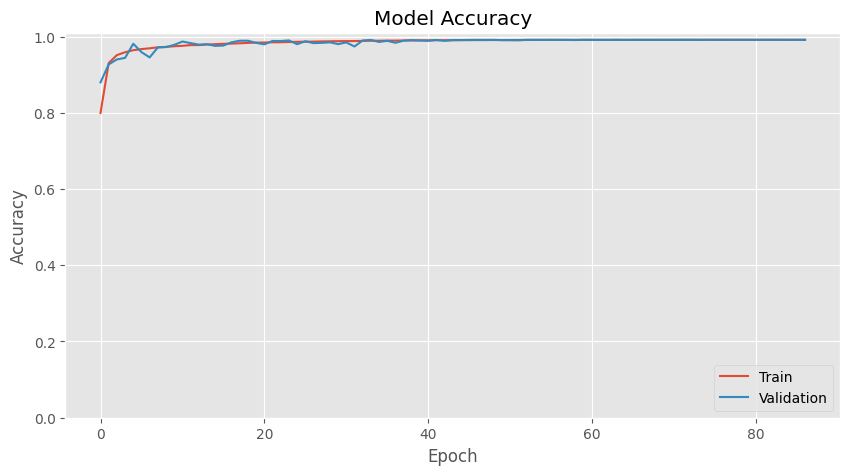

In [35]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.title('Model Accuracy')
plt.plot(history_model.history['accuracy'], label='Accuracy')
plt.plot(history_model.history['val_accuracy'], label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.ylim([0, 1.01])
plt.show()

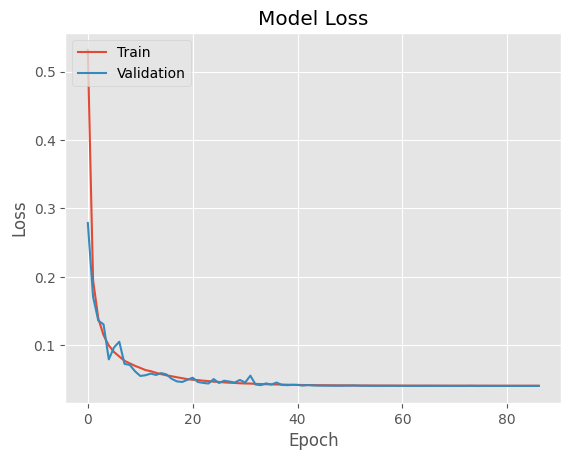

In [36]:
plt.plot(history_model.history['loss'], label='Training Loss')
plt.plot(history_model.history['val_loss'], label='Validation Loss')

plt.title('Model Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [37]:
model.save('./models/stunting_prediction.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
